<a href="https://colab.research.google.com/github/dyjdlopez/numeth2021/blob/main/Week%2017%20-%20Cognitive%20Algorithms/NuMeth_8_Cognitive_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cognitive Algorithms
$_{\text{©D.J. Lopez | 2021 | Computational Methods for Computer Engineers}}$

In this module we will take optimization a bit further by considering non-linear equations and using statistical learning to optimize the parameters of an algorithm to fit to a function or data. We will be discussing about:
* Machine Learning
* Gradient Descent and The Perceptron
* Linear Classification

## 8.1 Machine Learning

The main difference between machine learning and traditional programming is the paradigm at which a solution is created.

**Traditional Programming**

In traditional programming or the usual way, when we code a solution we start with a set of given inputs and some set of rules we code so that when we run our program with the set of inputs we get some desirable output.

**Machine Learning**

In machine learning programming, we have a set of inputs and outputs and we try to find a way to determine a rule, pattern, or equation that will describe the relationship between the inputs and outputs.

![image](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2034058%2F27e3bdf0545d237a1672fc201481774d%2Fml.png?generation=1562172278272384&alt=media)<br>

In this module, we will have a start with machine learning. We’ll learn about datasets and the learning algorithms that we can use to recognize patterns between datasets.

## 8.2 Gradient Descent

Diving deeper into the Machine Learning rabbit hole, we need to discuss the fundamental technique in machine learning—Gradient Descent. Gradient descent is an optimization algorithm used to minimize functions by iteratively moving in the direction of the steepest descent as defined by the negative of the gradient. In machine learning, gradient descent is used to update the parameters of models. In this section, we'll try to apply this algorithm with the fundamental unit of a neural network—the Perceptron.

### 8.2.2 The Perceptron Algorithm
The Perceptron was first conceptualized by Frank Rosenblatt in his paper [The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.335.3398&rep=rep1&type=pdf) in 1958. The perceptron is one of the earliest mathematical conceptualization of a brain neuron. In simplest terms, a perceptron does a weighted sum of all inputs and then performs an activation. In the early implementations of the perceptron the activation used was a step function described as:

$$Y = \text{step}(\omega X + b) \\ _{\text{(Eq. 8.1)}}$$

![image](https://jontysinai.github.io/assets/article_images/2017-11-11-the-perceptron/bio-vs-MCP.png)

#### Dataset
Since Machine Learning is statistical-based or data-driven, a dataset should be fed to our model to "learn" from example. This type of machine learning is called **supervised machine learning**.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
N = 100
m1 = np.array([-2, 0]).T
m2 = np.array([2, 0]).T
S = np.identity(2)

In this cell, $N$ represents the population of the dataset. Since we will make 2D gaussian datasets we need to set the centroid which is also the mean the gaussian distribution, it is represented as $m_i$. In this exaple, we have $m_1$ and $m_2$ representing the centroids of two distinct datasets. $S$ represents the covariance matrix, it pertains to the alignment and skewness of the dataset.

In [3]:
## Creating a Training Set
np.random.seed(0)
X_train = np.array([np.random.multivariate_normal(m1,S,int(N/2)),np.random.multivariate_normal(m2,S,int(N-(N/2)))]).T
y_train = np.array([np.ones(int(N/2)), np.zeros(int(N-(N/2)))]).reshape((-1,1))
X_train = np.concatenate((X_train[0], X_train[1]), axis=0)

In [18]:
## Creating a Testing Set
np.random.seed(0)
M = N*0.2
X_test = np.array([np.random.multivariate_normal(m1,S,int(M/2)),np.random.multivariate_normal(m2,S,int(M-(M/2)))]).T
X_test = np.concatenate((X_test[0], X_test[1]), axis=0)
y_test = np.array([np.ones(int(M/2)), np.zeros(int(M-(M/2)))]).reshape((-1,1))

In [15]:
## Create a Data Visualization Function
def visualize(X):
  plt.figure(figsize=(8,8))
  mid = int(X.shape[0]/2)
  plt.scatter(X[:mid,0], X[:mid,1], c='r', label='Class 1')
  plt.scatter(X[mid:,0], X[mid:,1], c='b', label='Class 0')

  plt.legend()
  plt.grid()
  plt.show()


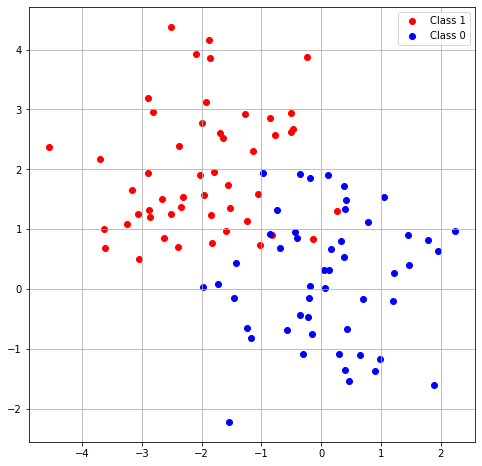

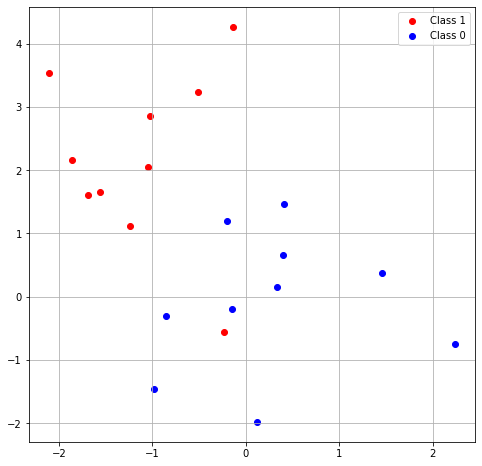

In [19]:
visualize(X_train)
visualize(X_test)

Gradient descent is an optimization algorithm that's used in training a machine learning model. It's based on a convex function and adjust its weights/parameters iteratively to optimize a given function.

You start gradient descent by defining the initial wieights and from there gradient descent uses derivatives to iteratively adjust the values so they optimize the given cost-function or loss function. 

In [20]:
## Weight Initialization
def init_weights(dim):
  """
  Does a zero-initialization of the weights and bias

  Arguments:
  dim -- Desired dimension for the weights.

  Return:
  w -- initialized weights
  b -- initilaized bias
  """
  w = np.zeros(shape=(dim,1))
  b = 0
  return w, b

#### Loss Function
A Loss Functions tells us “how good” our model is at making predictions for a given set of parameters. In our example we will be implementing SSE for the loss function:
$$\frac{1}{N}\sum^n_{i=0}(y_n-y^*_n)^2\\ _{\text{(Eq. 8.2)}}$$
Whereas $N$ is the population of the dataset, $y_n$ is the groud truth for the dataset and $y^*_n$ is the predicated value at the given input.

In [21]:
## The error function aka loss function. We are trying to minimize the 
## error of the model.
def sum_err(preds,y):
  """
  Computes the Sum of Squared Errors for a set of predictions
  and truth values

  Arguments:
  preds -- Set of predictions.
  y -- Set of truth values

  Return:
  sse -- Sum of the squared errors
  """
  sse = np.sum(np.square(y-preds))
  return sse


In [22]:
def accuracy(preds, Y):
  """
  Computes the accuracy for a set of predictions
  and truth values

  Arguments:
  preds -- Set of predictions.
  y -- Set of truth values

  Return:
  accuracy -- Computed accuracy
  """
  accuracy = 1-np.mean(np.abs(preds-Y))
  return accuracy

#### Activation Function
An activation maps the value of a perceptron. This differs the perceptron with a regular linear regressor. In our case, the activation is a **step function**. The step function can be defined as: 
$$step(z) = \left\{
  \begin{array}\\
    1 \text{ if } \ b+ \sum w_iX_n\geq 0 \\
    0 \text{ otherwise}
    \end{array}
\right. \\ _{\text{(Eq. 8.3)}}
$$
Whereas $z$ is the linear regressor part of the perceptron computed as $b+ wX$.

In [23]:
def step_activation(z):
  """
  Compute the step activation of z

  Arguments:
  z -- A scalar or numpy array of any size.

  Return:
  filtered step activations step(z)
  """
  return np.where(z>=0, 1,0)

#### Gradient

A gradient is the change in all weights with respect to the change in error. You can think that a gradient as the slope of a function. The higher the gradient, the steeper the slope and the faster a model can learn. But if the slope is zero, the model stops learning. 

To solve for the gradient, we iterate through our data points using our new m and b values and compute the partial derivatives. This new gradient tells us the slope of our cost function at our current position (current parameter values) and the direction we should move to update our parameters. The size of our update is controlled by the learning rate.

In [24]:
def propagate(X,y,w,b):

  # Compute for the transformed vector of the 
  # dataset w.r.t the weights and biases
  z = (X@w) + b

  # Compute for the step activation
  A = step_activation(z)

  # Compute for the prediction error
  error = A-y
  acc = accuracy(y,A)

  # Update the weights and biases
  # Learning/Update routine
  w = np.dot(X.T,error)
  b = np.sum(error)

  # Compute the cost
  cost = sum_err(A,y)

  # Store the parameters in a dictionary for tracking
  grads = {"dw": w,
           "db": b}
  
  return grads, cost, acc

In [25]:
w,b = init_weights(X_train.shape[1])
propagate(X_train,y_train,w,b)

({'db': 50.0, 'dw': array([[5.14049338],
         [9.13737342]])}, 50.0, 0.5)

In [26]:
## Training function
def train(w, b, X, y, lr, epochs, early_stopping=True, stop_thresh=0.9):
  costs = []
  accuracies = []

  for i in range(epochs):
    # Do a forward propagation to obtain the gradients
    grads, cost, accuracy = propagate(X,y,w,b)

    # Locally store the gradients    
    dw=grads['dw']
    db=grads['db']

    # Update routine per epoch
    w = w - lr*dw
    b = b - lr*db

    # Store the costs per epoch for logs      
    
    if i % 20 == 0:
      print (f"Epoch {i}: Loss: {cost} Accuracy: {accuracy}")
      costs.append(cost)
      accuracies.append(accuracy)

    # Store the learned parameters for logs
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    if early_stopping and accuracy >= stop_thresh:
      print(f"Target metric met, stopping the training at {i} epoch(s).\n")
      break

  return params, grads, costs

In [27]:
### Running the machine learning training
w,b = init_weights(X_train.shape[1])
learning_rate = 1
epochs = 100

params, grads, costs = train(w, b, X_train, y_train, 
                             lr=learning_rate, epochs=epochs, 
                             early_stopping=True, stop_thresh=1.0)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Epoch 0: Loss: 50.0 Accuracy: 0.5
Epoch 20: Loss: 8.0 Accuracy: 0.92
Epoch 40: Loss: 6.0 Accuracy: 0.94
Epoch 60: Loss: 11.0 Accuracy: 0.89
Epoch 80: Loss: 16.0 Accuracy: 0.84
w = [[-14.03301621]
 [ 14.90592208]]
b = -25.0
dw = [[ 1.96685423]
 [-2.95259353]]
db = -4.0


In [28]:
def predict(X, weights, bias):
  z = (X@weights)+bias
  return np.where(z>=0, 1,0)


In [29]:
## Testing out the test set
weights = params["w"]
bias = params["b"]
preds = predict(X_test,weights,bias)
accuracy(y_test, preds)

0.95

#### Machine Learning Model Performance
There are several ways to determine the success of a machine learning model. We will learn about this in the Machine Learning Elective. But just to get the main idea how effective an ML model is, we use a confusion matrix to see the frequency of detections with respect to the groud truth

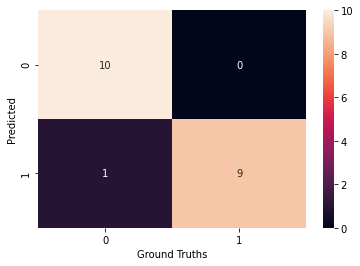

In [32]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, preds)
sns.heatmap(c_matrix, annot=True)
plt.xlabel("Ground Truths")
plt.ylabel("Predicted")
plt.show()

In [33]:
def plot_weights(X,w,b):
  plt.figure(figsize=(10,10))
  plt.scatter(X[:int(X.shape[0]/2),0], X[:int(X.shape[0]/2),1], 
              s = 50, color='blue', alpha=0.5, label=1)
  plt.scatter(X[int(X.shape[0]/2):,0], X[int(X.shape[0]/2):,1],  
              s = 50, color='red', alpha=0.5, label=0)
  x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
  linex = np.linspace(x_min, x_max)
  liney = -w[0]/w[1] * linex - b/w[1]
  plt.plot(linex, liney, label='decision bounday')
  plt.legend()
  plt.axhline(color='black')
  plt.axvline(color='black')
  plt.grid()
  plt.show()

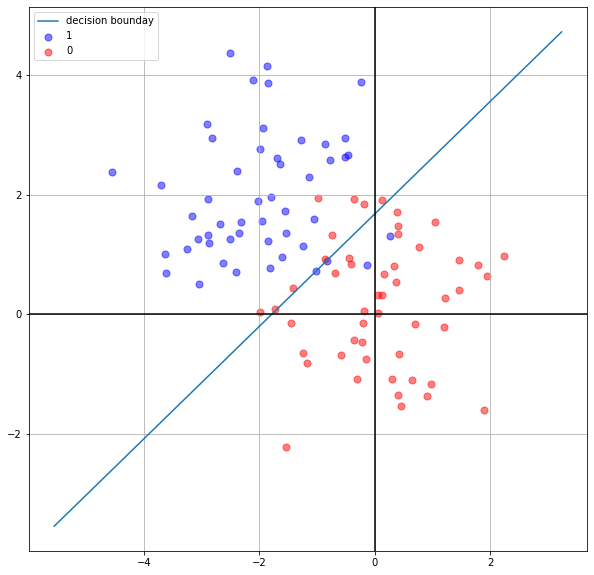

In [34]:
plot_weights(X_train,params['w'],params['b'])